
# Mask on face detection <a class="anchor" id="section_0"></a>

POIDVIN Hugo, LAY Frédéric, NGUYEN VAN NGUYEN Vincent, LECORFF Erwann

This notebook contains a project which aim to detect the presence or not of a face mask on human faces.
The work will take the form of a classification algorithm which will differentiate photos between 2 categories :
-   People wearing a mask
-   People **NOT** wearing a mask


Data from kaggle : [Here](https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset)


### Table of Contents

* [Introduction](#section_0)
* [Imports](#section_1)
* [Sampling](#section_2)
* [Dataset setup](#section_3)


# Imports <a class="anchor" id="section_1"></a>

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

# Sampling <a class="anchor" id="section_2"></a>

initializing paths to our differents images :

In [30]:
#paths initialization
Test_path_Mask = Path("./New Masks Dataset/Test/Mask")
Test_path_Non_Mask = Path("./New Masks Dataset/Test/Non Mask")
Train_path_Mask = Path("./New Masks Dataset/Train/Mask")
Train_path_Non_Mask = Path("./New Masks Dataset/Train/Non Mask")
Validation_path_Mask = Path("./New Masks Dataset/Validation/Mask")
Validation_path_Non_Mask = Path("./New Masks Dataset/Validation/Non Mask")

Collecting 2 photos, one face with mask and one without :

In [31]:
#Collecting one masked face image :
Test_mask_img_list = os.listdir(Test_path_Mask)
masked_image = cv2.imread(str(Test_path_Mask) + "/" + Test_mask_img_list[0])
masked_rgb_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)  #converting it to RGB because opencv use BGR format when loading through imread() function
#Collecting one unmasked face image :
Test_Non_mask_img_list = os.listdir(Test_path_Non_Mask)
Unmasked_image = cv2.imread(str(Test_path_Non_Mask) + "/" + Test_Non_mask_img_list[0])
Unmasked_rgb_image = cv2.cvtColor(Unmasked_image, cv2.COLOR_BGR2RGB)  #same

Showing our 2 pictures :

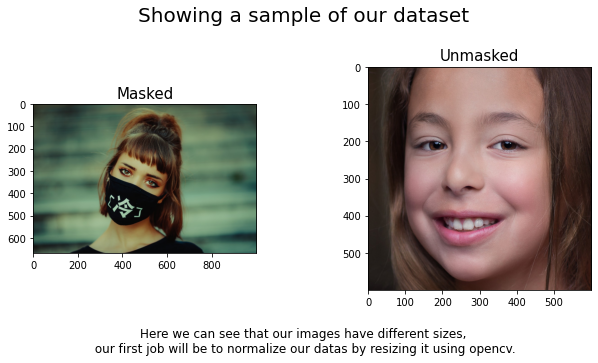

In [32]:
#creating subplot using labels
fig, ax = plt.subplot_mosaic([['Masked', 'Unmasked']], figsize=(10, 5))

ax['Masked'].imshow(masked_rgb_image)
ax['Unmasked'].imshow(Unmasked_rgb_image)
ax['Masked'].set_title('Masked', fontsize="15")
ax['Unmasked'].set_title('Unmasked', fontsize="15")

fig.suptitle('Showing a sample of our dataset', fontsize="20")
plt.subplots_adjust(wspace=0.5)
fig.supxlabel(
    'Here we can see that our images have different sizes,\n our first job will be to normalize our datas by resizing it using opencv.')
plt.show()

# Dataset setup <a class="anchor" id="section_3"></a>

Checking the actual dataset distribution :

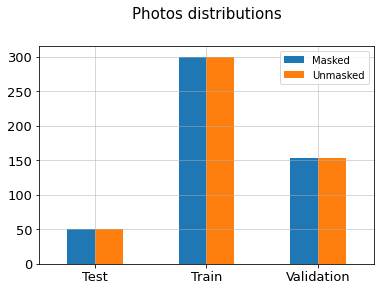

In [33]:
#creating a dict to facilitate the dataframe creation and plotting
data = {'Masked': [len(os.listdir(Test_path_Mask)),
                   len(os.listdir(Train_path_Mask)),
                   len(os.listdir(Validation_path_Mask))],
        'Unmasked': [len(os.listdir(Test_path_Non_Mask)),
                     len(os.listdir(Train_path_Non_Mask)),
                     len(os.listdir(Validation_path_Non_Mask))]}

df = pd.DataFrame(data)
df.index = ['Test', 'Train', 'Validation']
ax = df.plot(kind="bar", fontsize=13)
ax.set_title("Photos distributions", fontsize=15, y=11 / 10)
plt.xticks(rotation=0)
plt.grid(linewidth=0.5)

Initializing our differents sets :

In [40]:
X_train = []
y_train = []
X_test = []
y_test = []
X_Valid = []
y_Valid = []

dim = 64  # initializing the dimension of our photos, final dimension will be dim*dim

category = {'Non Mask': 0, 'Mask': 1}  #creating to dict to affect a boolean target to each photo

directory = ["./New Masks Dataset/Train", "./New Masks Dataset/Test", "./New Masks Dataset/Validation"]

for subdirectory in directory :
    for item in os.listdir(subdirectory):  #looping through the subdirectory
        path = os.path.join(subdirectory, item)  #adding "Mask" or "Non Mask" to the subdirectory path
        for image in os.listdir(path):  #looping through "/subdirectory/Mask" then through "/subdirectory/Non Mask"
            img = cv2.imread(os.path.join(path, image))  #reading the image using opencv
            img = cv2.resize(img, (dim, dim))  #resizing to normalize our datas
            if subdirectory == "./New Masks Dataset/Train" :
                X_train.append(img)
                y_train.append(category[item])
            elif subdirectory == "./New Masks Dataset/Test" :
                X_test.append(img)
                y_test.append(category[item])
            else :
                X_Valid.append(img)
                y_Valid.append(category[item])


In [41]:
X_test

[array([[[ 39,  58,  55],
         [ 45,  62,  58],
         [ 49,  68,  65],
         ...,
         [ 52,  62,  50],
         [ 51,  62,  52],
         [ 53,  64,  54]],
 
        [[ 37,  51,  49],
         [ 42,  56,  52],
         [ 48,  62,  56],
         ...,
         [ 55,  64,  51],
         [ 54,  66,  54],
         [ 57,  69,  55]],
 
        [[ 37,  48,  45],
         [ 43,  56,  49],
         [ 51,  63,  54],
         ...,
         [ 58,  68,  50],
         [ 59,  70,  53],
         [ 61,  74,  57]],
 
        ...,
 
        [[ 21,  24,  24],
         [ 28,  30,  28],
         [ 33,  37,  32],
         ...,
         [103, 118,  70],
         [ 98, 110,  60],
         [ 97, 111,  60]],
 
        [[ 34,  38,  33],
         [ 37,  44,  37],
         [ 47,  56,  45],
         ...,
         [102, 121,  70],
         [103, 120,  69],
         [102, 118,  67]],
 
        [[ 51,  58,  45],
         [ 56,  65,  49],
         [ 64,  77,  61],
         ...,
         [ 97, 109,  59],
  

Showing our 2 modified pictures :

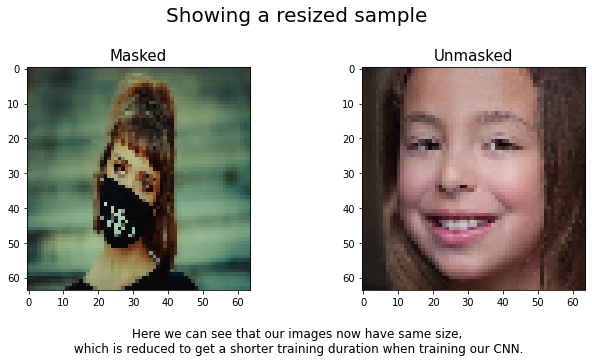

In [42]:
fig, ax = plt.subplot_mosaic([['Masked', 'Unmasked']], figsize=(10, 5))

ax['Masked'].imshow(cv2.cvtColor(X_test[0], cv2.COLOR_BGR2RGB)) # Converting BGR to RGB because of opencv reading format
ax['Unmasked'].imshow(cv2.cvtColor(X_test[50], cv2.COLOR_BGR2RGB))

ax['Masked'].set_title('Masked', fontsize="15")
ax['Unmasked'].set_title('Unmasked', fontsize="15")

fig.suptitle('Showing a resized sample', fontsize="20")
plt.subplots_adjust(wspace=0.5)
fig.supxlabel(
    'Here we can see that our images now have same size,\n which is reduced to get a shorter training duration when training our CNN.')
plt.show()